# Concept Mapping using MedCat mapper

## Define base directory

In [1]:
baseDir = '/superbugai-data/yash/temp'

## Read Concept Names

In [2]:
import pandas as pd

conceptsDf = pd.read_csv(baseDir + '/' + 'concept_names.txt', sep='\t')
conceptsDf

,concept_name,concept_code,source_concept_id,source_vocabulary_id,source_domain_id,source_concept_class_id,target_concept_id,relationship_id,reverese_relationship_id,concept_name_con,domain_id,vocab_id,concept_class_id,standard
0,Emergency Department,Emergency Department,2000001901,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,Emergency Room - Hospital,Visit,CMS Place of Service,Visit,S
1,Medicine,Medicine,2000001902,mimiciv_cs_place_of_service,Visit,Visit,38004515,Maps to,Mapped from,Hospital,Visit,Medicare Specialty,Visit,S
2,Emergency Department Observation,Emergency Department Observation,2000001903,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,Emergency Room - Hospital,Visit,CMS Place of Service,Visit,S
3,Nursery - Well Babies,Nursery - Well Babies,2000001904,mimiciv_cs_place_of_service,Visit,Visit,4160140,Maps to,Mapped from,Newborn nursery unit,Observation,SNOMED,Location,S
4,Medicine/Cardiology,Medicine/Cardiology,2000001905,mimiciv_cs_place_of_service,Visit,Visit,581383,Maps to,Mapped from,Inpatient Cardiac Care Facility,Visit,CMS Place of Service,Visit,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,NMED,NMED,2000001864,mimiciv_vis_service,Visit,Visit,4150070,Maps to,Mapped from,Neurology department,Observation,SNOMED,Location,S
3838,VSURG,VSURG,2000001865,mimiciv_vis_service,Visit,Visit,4150086,Maps to,Mapped from,Vascular surgery department,Observation,SNOMED,Location,S
3839,PSURG,PSURG,2000001866,mimiciv_vis_service,Visit,Visit,4150085,Maps to,Mapped from,Plastic surgery department,Observation,SNOMED,Location,S
3840,TSURG,TSURG,2000001867,mimiciv_vis_service,Observation,Location,4148989,Maps to,Mapped from,Thoracic surgery department,Observation,SNOMED,Location,S


## Read SNOMED vocabulary

In [3]:
import pandas as pd

baseDir = '/superbugai-data/yash/temp'
snomedDf = pd.read_csv(baseDir + '/preprocessed_snomed.csv')
snomedDf = snomedDf[snomedDf.name_status == 'P']

In [4]:
snomedDf

,cui,name,name_status,ontologies,description_type_ids,type_ids
0,10000006,Radiating chest pain (finding),P,SNOMED-CT,finding,67667581
1,1000001000168107,"Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet, ...",P,SNOMED-CT,containered trade product pack,19443049
2,100001000032107,Mass of left side of middle abdomen (finding),P,SNOMED-CT,finding,67667581
3,1000011000168105,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,NaN,72706784
4,1000021000168103,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,trade product pack,44751718
...,...,...,...,...,...,...
507707,999951000168105,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,trade product pack,44751718
507708,999961000168107,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,containered trade product pack,19443049
507709,999971000168101,Pantoprazole Heartburn Relief (Apohealth) (tra...,P,SNOMED-CT,trade product,99637394
507710,999981000168103,Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet (...,P,SNOMED-CT,NaN,72706784


## Initialise MedCat

In [9]:
# !pip install spacy==3.0.8
# !pip uninstall spacy -y

  Using cached spacy-3.0.8-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.9 MB)
  Using cached thinc-8.0.17-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (668 kB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.5
    Uninstalling thinc-8.1.5:
      Successfully uninstalled thinc-8.1.5
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

medcat 1.4.0 requires blis<=0.7.5, but you'll have blis 0.7.9 which is incompatible.
medcat 1.4.0 requires spacy<3.1.4,>=3.1.0, but you'll have spacy 3.0.8 which is incompatible.
en-core-web-md 3.1.0 requires spacy<3.2.0,>=3.1.0, but you'll have spacy 3.0.8 which is incompatible.
You should consider upgrading via the '/superbugai-data/yash/chapter_1/workspace/EHRQC/no

In [3]:
# Run it for the first time only

# !python -m spacy download en_core_web_md

     |████████████████████████████████| 47.1 MB 504 kB/s eta 0:00:011    |█▉                              | 2.7 MB 35.3 MB/s eta 0:00:02
  Attempting uninstall: en-core-web-md
    Found existing installation: en-core-web-md 3.1.0
    Uninstalling en-core-web-md-3.1.0:
      Successfully uninstalled en-core-web-md-3.1.0
You should consider upgrading via the '/home/yram0006/phd/chapter_1/workspace/EHRQC/notebooks/.venv/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [4]:
# Run it for the first time only

# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_md-0.4.0.tar.gz
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_md-0.4.0.tar.gz (125.2 MB)
  Created wheel for en-core-sci-md: filename=en_core_sci_md-0.4.0-py3-none-any.whl size=125733929 sha256=50523c028fb13873dbd4eb342bdbbe5d65501af72e7ec59e1ce048fde0b39b93
  Stored in directory: /home/yram0006/.cache/pip/wheels/64/f1/f3/5c8850c6df95b06b05f6c012733b9e3c6e62bf5851a92213d7
Successfully built en-core-sci-md
You should consider upgrading via the '/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/bin/python -m pip install --upgrade pip' command.
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz (538.1 MB)
  ERROR: Command errored out with exit status 1:
   command: /superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/.venv/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-req-build-8f4c2ut5/setup.py'"'"'; __file__='"'"'/tmp/pip-req-build-8f4c2ut5/setu

In [5]:
from medcat.vocab import Vocab
from medcat.cdb import CDB
from medcat.cat import CAT
from medcat.meta_cat import MetaCAT

from tqdm import tqdm

# Load the vocab model you downloaded
vocab = Vocab.load(baseDir + '/' + 'trained_vocs/shared/vocab.dat')
# Load the cdb model you downloaded
cdb = CDB.load(baseDir + '/' + 'SNOMED_cdb.dat')

# Download the mc_status model from the models section below and unzip it
mc_status = MetaCAT.load(baseDir + '/' + "trained_vocs/shared/mc_status")
cat = CAT(cdb=cdb, config=cdb.config, vocab=vocab, meta_cats=[mc_status])

/home/yram0006/phd/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/yram0006/phd/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/medcat/cat.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


## Match entities using MedCat

In [6]:
def performMedcatMatching(conceptId, conceptName, conceptVocabularyId):
    return conceptId, conceptName, conceptVocabularyId, cat.get_entities(conceptName)

from tqdm import tqdm

matchingOutputMedcat = []
for i, row in tqdm(conceptsDf.iterrows()):
    matchingOutputMedcat.append(
            performMedcatMatching(row.source_concept_id, row.concept_name, row.source_vocabulary_id)
    )

matchingOutputMedcatDf = pd.DataFrame(matchingOutputMedcat, columns=['concept_id', 'concept_name', 'concept_vocabulary_id', 'matching_concept'])
matchingOutputMedcatDf

3842it [32:21,  1.98it/s]


,concept_id,concept_name,concept_vocabulary_id,matching_concept
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ..."
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}"
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ..."
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Nursery', 'c..."
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Cardiology',..."
...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"


## Save mapped results

In [8]:
import pandas as pd

matchingOutputMedcatDf.to_csv(baseDir + '/' + 'mapped_concept_names_medcat_2.csv', index=False)

## Read mapped results

In [9]:
import pandas as pd

tempDir = '/superbugai-data/yash/temp'
matchingOutputMedcatDf = pd.read_csv(tempDir + '/mapped_concept_names_medcat_2.csv')

In [10]:
matchingOutputMedcatDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ..."
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}"
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ..."
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Nursery', 'c..."
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Cardiology',..."
...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"


## Analyse the results

<AxesSubplot:>

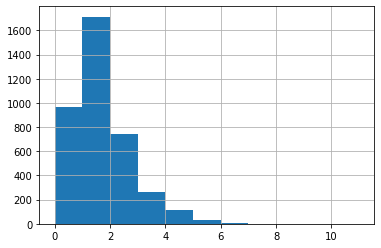

In [13]:
import ast

matchingOutputMedcatDf["matching_concept"]\
    .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
    .apply(lambda matchingConcept: len(matchingConcept['entities']))\
    .hist(bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [14]:
import ast

matchingOutputMedcatDf["matching_concept"]\
    .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
    .apply(lambda matchingConcept: len(matchingConcept['entities']))\
    .value_counts()

1    1713
0     970
2     741
3     259
4     116
5      34
6       6
7       1
9       1
8       1
Name: matching_concept, dtype: int64

In [15]:
import ast

cuis = []
conceptTypes = []
conceptPrettyNames = []
conceptSourceValues = []
contextSimilarityScores = []
for i, row in matchingOutputMedcatDf.iterrows():
    entities = ast.literal_eval(row["matching_concept"])['entities']
    cui = None
    conceptType = None
    conceptPrettyName = None
    conceptSourceValue = None
    maxContextSimilarityScore = 0
    for key in entities.keys():
        entity = entities[key]
        contextSimilarityScore = float(entity['context_similarity'])
        if contextSimilarityScore > maxContextSimilarityScore:
            cui = entity['cui']
            conceptType = entity['type_ids']
            conceptPrettyName = entity['pretty_name']
            conceptSourceValue = entity['source_value']
            maxContextSimilarityScore = contextSimilarityScore
    cuis.append(cui)
    conceptTypes.append(conceptType)
    conceptPrettyNames.append(conceptPrettyName)
    conceptSourceValues.append(conceptSourceValue)
    contextSimilarityScores.append(maxContextSimilarityScore)

matchingOutputMedcatDf['CUI'] = cuis
matchingOutputMedcatDf['Concept Type'] = conceptTypes
matchingOutputMedcatDf['Concept Pretty Names'] = conceptPrettyNames
matchingOutputMedcatDf['Concept Source Values'] = conceptSourceValues
matchingOutputMedcatDf['Context Similarity Score'] = contextSimilarityScores

In [16]:
matchingOutputMedcatDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ...",25876001,[7882689],Emergency,Emergency,1.0
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ...",25876001,[7882689],Emergency,Emergency,1.0
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Nursery', 'c...",161117005,[67667581],Nursery,Nursery,1.0
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Cardiology',...",394579002,[7882689],Cardiology,Cardiology,1.0
...,...,...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0


In [17]:
matchingOutputMedcatDf.CUI.notna().sum()

2872

In [18]:
matchingOutputMedcatDf.CUI.isna().sum()

970

In [19]:
matchingOutputMedcatDf.CUI.isna().sum()/matchingOutputMedcatDf.shape[0]*100

25.247267048412287

In [20]:
matchingConceptsDf = matchingOutputMedcatDf[matchingOutputMedcatDf['concept_name'].notna()]

In [21]:
matchingConceptsDf[matchingConceptsDf['concept_name'].str.contains('STAPHYLOCOCCUS')]

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score
1725,2000026023,STAPHYLOCOCCUS EPIDERMIDIS,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,60875001,[81102976],Staphylococcus epidermidis,STAPHYLOCOCCUS EPIDERMIDIS,1.0
1834,2000026132,STAPHYLOCOCCUS SPECIES,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Genus Staphy...,65119002,[81102976],Genus Staphylococcus,STAPHYLOCOCCUS SPECIES,1.0
1849,2000026147,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,116197008,[81102976],"Staphylococcus, coagulase negative","STAPHYLOCOCCUS, COAGULASE NEGATIVE",1.0
1854,2000026152,STAPHYLOCOCCUS LUGDUNENSIS,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,103494005,[81102976],Staphylococcus lugdunensis,STAPHYLOCOCCUS LUGDUNENSIS,1.0
1939,2000026236,"STAPHYLOCOCCUS SAPROPHYTICUS, PRESUMPTIVE IDEN...",mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,19743000,[81102976],Staphylococcus saprophyticus,STAPHYLOCOCCUS SAPROPHYTICUS,1.0
1946,2000026243,"STAPHYLOCOCCUS, COAGULASE NEGATIVE, PRESUMPTIV...",mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,116197008,[81102976],"Staphylococcus, coagulase negative","STAPHYLOCOCCUS, COAGULASE NEGATIVE",1.0
2031,2000026328,STAPHYLOCOCCUS HAEMOLYTICUS,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,83452006,[81102976],Staphylococcus haemolyticus,STAPHYLOCOCCUS HAEMOLYTICUS,1.0
2046,2000026343,STAPHYLOCOCCUS CAPITIS,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,40347003,[81102976],Staphylococcus capitis,STAPHYLOCOCCUS CAPITIS,1.0
2047,2000026344,STAPHYLOCOCCUS HOMINIS,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,44827007,[81102976],Staphylococcus hominis,STAPHYLOCOCCUS HOMINIS,1.0
2048,2000026345,STAPHYLOCOCCUS WARNERI,mimiciv_micro_organism,{'entities': {1: {'pretty_name': 'Staphylococc...,63550006,[81102976],Staphylococcus warneri,STAPHYLOCOCCUS WARNERI,1.0


In [25]:
snomedDf['cui'] = snomedDf.cui.astype(str)

In [28]:
import pandas as pd

mergedDf = pd.merge(matchingConceptsDf, snomedDf, left_on='CUI', right_on='cui', how='left')

In [29]:
mergedDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score,cui,name,name_status,ontologies,description_type_ids,type_ids
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ...",25876001,[7882689],Emergency,Emergency,1.0,25876001,Emergency (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ...",25876001,[7882689],Emergency,Emergency,1.0,25876001,Emergency (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Nursery', 'c...",161117005,[67667581],Nursery,Nursery,1.0,161117005,Nursery (finding),P,SNOMED-CT,finding,67667581.0
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Cardiology',...",394579002,[7882689],Cardiology,Cardiology,1.0,394579002,Cardiology (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
groupedDf = mergedDf\
    .groupby(['concept_vocabulary_id', 'description_type_ids'])\
        .agg(
                {
                    'concept_name':'count',
                }
            )\
                .reset_index()
groupedDf

,concept_vocabulary_id,description_type_ids,concept_name
0,mimiciv_cs_place_of_service,finding,1
1,mimiciv_cs_place_of_service,qualifier value,3
2,mimiciv_drug_ndc,AU qualifier,1
3,mimiciv_drug_ndc,body structure,4
4,mimiciv_drug_ndc,clinical drug,83
...,...,...,...
135,mimiciv_vis_discharge_location,qualifier value,2
136,mimiciv_vis_service,body structure,4
137,mimiciv_vis_service,disorder,1
138,mimiciv_vis_service,intended site,1


In [34]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_cs_place_of_service']

,concept_vocabulary_id,description_type_ids,concept_name
0,mimiciv_cs_place_of_service,finding,1
1,mimiciv_cs_place_of_service,qualifier value,3


In [35]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_micro_organism']

,concept_vocabulary_id,description_type_ids,concept_name
58,mimiciv_micro_organism,disorder,2
59,mimiciv_micro_organism,finding,1
60,mimiciv_micro_organism,organism,315
61,mimiciv_micro_organism,qualifier value,37


In [36]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_drug_ndc']

,concept_vocabulary_id,description_type_ids,concept_name
2,mimiciv_drug_ndc,AU qualifier,1
3,mimiciv_drug_ndc,body structure,4
4,mimiciv_drug_ndc,clinical drug,83
5,mimiciv_drug_ndc,disorder,1
6,mimiciv_drug_ndc,dose form,157
7,mimiciv_drug_ndc,finding,2
8,mimiciv_drug_ndc,medicinal product,14
9,mimiciv_drug_ndc,observable entity,2
10,mimiciv_drug_ndc,organism,5
11,mimiciv_drug_ndc,physical object,5


In [37]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_drug_route']

,concept_vocabulary_id,description_type_ids,concept_name
16,mimiciv_drug_route,body structure,8
17,mimiciv_drug_route,intended site,2
18,mimiciv_drug_route,procedure,5
19,mimiciv_drug_route,qualifier value,3
20,mimiciv_drug_route,substance,1


In [38]:
groupedDf[groupedDf.concept_vocabulary_id == 'mimiciv_proc_datetimeevents']

,concept_vocabulary_id,description_type_ids,concept_name
101,mimiciv_proc_datetimeevents,administration method,2
102,mimiciv_proc_datetimeevents,body structure,5
103,mimiciv_proc_datetimeevents,disorder,5
104,mimiciv_proc_datetimeevents,environment,2
105,mimiciv_proc_datetimeevents,observable entity,4
106,mimiciv_proc_datetimeevents,occupation,1
107,mimiciv_proc_datetimeevents,physical object,40
108,mimiciv_proc_datetimeevents,procedure,13
109,mimiciv_proc_datetimeevents,qualifier value,37
